In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import random
import math

In [2]:
data = np.load('k49-test-imgs.npz')
x_test = data['arr_0']
data = np.load('k49-train-imgs.npz')
x_train = data['arr_0']
data = np.load('k49-train-labels.npz')
y_train = data['arr_0']
data = np.load('k49-test-labels.npz')
y_test = data['arr_0']

In [3]:
data = pd.read_csv("k49_classmap.csv")
print(data.char[0])

あ


In [36]:
#print(y.files)
print(x_train[1].shape)

(28, 28)


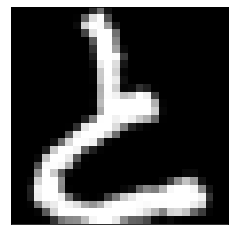

66


In [26]:
plt.imshow(x_train[1], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
print(x_train[1].argmax())

In [16]:
print(x_train.shape[0])
print(x_test.shape[0])

#x_train = x_train.reshape(x_train.shape[0], 48, 48,1)
#x_test = x_test.reshape(x_test.shape[0], 48, 48,1)

232365
38547


ValueError: cannot reshape array of size 182174160 into shape (232365,48,48)

In [4]:
num_classes = 49
input_shape = (28, 28, 1)


# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (232365, 28, 28, 1)
232365 train samples
38547 test samples


In [5]:
#datagen = ImageDataGenerator(rotation_range=15,zoom_range=0.2)
#datagen.fit(x_train)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(1, 1)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1024, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

2021-09-24 19:26:28.042049: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-24 19:26:28.051602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-24 19:26:28.052238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-24 19:26:28.053610: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train,y_train,batch_size=128,shuffle=True),epochs=30 ,validation_data=(x_test,y_test))

/home/franciscocaetano/.local/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-09-24 19:10:44.917279: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2021-09-24 19:10:46.168429: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101


1816/1816 [==============================] - 61s 32ms/step - loss: 0.6585 - accuracy: 0.8183 - val_loss: 0.3940 - val_accuracy: 0.8975
Epoch 2/30
1816/1816 [==============================] - 58s 32ms/step - loss: 0.3113 - accuracy: 0.9100 - val_loss: 0.2899 - val_accuracy: 0.9237
Epoch 3/30
1816/1816 [==============================] - 57s 32ms/step - loss: 0.2523 - accuracy: 0.9271 - val_loss: 0.2377 - val_accuracy: 0.9380
Epoch 4/30
1816/1816 [==============================] - 58s 32ms/step - loss: 0.2201 - accuracy: 0.9353 - val_loss: 0.2206 - val_accuracy: 0.9430
Epoch 5/30
1816/1816 [==============================] - 58s 32ms/step - loss: 0.1984 - accuracy: 0.9413 - val_loss: 0.2203 - val_accuracy: 0.9447
Epoch 6/30
1816/1816 [==============================] - 58s 32ms/step - loss: 0.1845 - accuracy: 0.9451 - val_loss: 0.2029 - val_accuracy: 0.9490
Epoch 7/30
1816/1816 [==============================] - 56s 31ms/step - loss: 0.1718 - accuracy: 0.9489 - val_loss: 0.1933 - val_accura

KeyboardInterrupt: 

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle = True)

2021-09-24 19:26:44.728407: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2021-09-24 19:26:46.018770: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101


1634/1634 [==============================] - 37s 21ms/step - loss: 0.4962 - accuracy: 0.8657 - val_loss: 0.1850 - val_accuracy: 0.9499
Epoch 2/15
1634/1634 [==============================] - 33s 20ms/step - loss: 0.1981 - accuracy: 0.9432 - val_loss: 0.1402 - val_accuracy: 0.9626
Epoch 3/15
1634/1634 [==============================] - 32s 20ms/step - loss: 0.1511 - accuracy: 0.9560 - val_loss: 0.1318 - val_accuracy: 0.9635
Epoch 4/15
1634/1634 [==============================] - 33s 20ms/step - loss: 0.1258 - accuracy: 0.9624 - val_loss: 0.1136 - val_accuracy: 0.9695
Epoch 5/15
1634/1634 [==============================] - 34s 21ms/step - loss: 0.1084 - accuracy: 0.9672 - val_loss: 0.1077 - val_accuracy: 0.9707
Epoch 6/15
1634/1634 [==============================] - 33s 20ms/step - loss: 0.0950 - accuracy: 0.9711 - val_loss: 0.1075 - val_accuracy: 0.9720
Epoch 7/15
1634/1634 [==============================] - 34s 21ms/step - loss: 0.0851 - accuracy: 0.9733 - val_loss: 0.1061 - val_accura

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1871126890182495
Test accuracy: 0.9582328200340271


In [8]:
model.save("hiragana-model.h5") 

In [11]:
what = x_test[1].copy()
what = np.expand_dims(what, axis=0)
y_pred = model.predict(what)
print(y_pred.shape)

(1, 49)


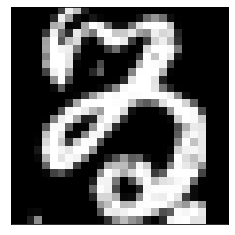

る


In [13]:
plt.imshow(x_test[2000], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
print(data.char[y_pred[2000].argmax()])